# <font color='red'>Test Statistics</font>

**Parametric Test Statistics:** These tests make assumptions about the population distribution, such as normality and homogeneity of variance.<br>
**Non-parametric Test Statistics:** These tests make fewer or no assumptions about the population distribution. They are often used when data do not meet parametric assumptions.<br>

**Univariate Test Statistics:** These tests involve the analysis of one variable at a time.<br>
**Multivariate Test Statistics:** These tests involve the analysis of multiple variables simultaneously.<br>

**One-sample Test Statistics:** These tests compare a sample mean or proportion to a known population mean or proportion.<br>
**Two-sample Test Statistics:** These tests compare means or proportions between two independent samples.<br>
**Multi-sample Test Statistics:** These tests compare means or proportions across three or more independent samples.<br>

**Continuous Test Statistics:** These tests analyze continuous variables.<br>
**Categorical Test Statistics:** These tests analyze categorical variables.<br>

**Directional Test Statistics:** These tests assess whether the effect is greater than, less than, or equal to a specified value.<br>
**Non-directional Test Statistics:** These tests assess whether there is a difference without specifying the direction.<br>

**Associational Test Statistics:** These tests measure the strength and direction of association between variables.<br> 
**Inferential Test Statistics:** These tests make inferences about populations based on sample data. 

1. t-Statistic
2. Z-Score
3. F-Statistic
4. Chi-Square Statistic
5. Pearson’s Correlation Coefficient
6. Spearman’s Rank Correlation Coefficient
7. Wilcoxon Rank-Sum Statistic
8. Kruskal-Wallis H Statistic
9. Kolmogorov-Smirnov Statistic
10. Mann-Whitney Staistic

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### t-Statistic

* Parametric
* Univariate
* Continuous
* Directional
* Associated with hypothesis testing and confidence intervals for means

$$
t = \frac{{\bar{x} - \mu}}{{\frac{s}{\sqrt{n}}}}
$$
$ \bar{x} $ = sample mean <br>
μ = population mean (or hypothesized mean under the null hypothesis) <br>
s = sample standard deviation <br>
n = sample size

$$
t = \frac{{\bar{x}_1 - \bar{x}_2}}{{\sqrt{\frac{{s_1^2}}{{n_1}} + \frac{{s_2^2}}{{n_2}}}}}
$$

$ \bar{x}_1 \bar{x}_2 $ = sample means of the two groups<br>
$ s_1 s_2 $ = sample standard deviations of the two groups<br>
$ n_1 n_2 $ = sample sizes of the two groups

**When to use:** Use when comparing means of two samples, particularly when the sample sizes are small and/or the population standard deviations are unknown.<br>
**Strengths:** Appropriate for small sample sizes, robust to deviations from normality.<br>
**Weaknesses:** Less efficient than the z-test for large sample sizes.<br>
**Limitations:** Assumes normality, sensitive to outliers.

In [2]:
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import t

A marketing manager wants to determine if there is a significant difference in the effectiveness of two different advertising campaigns in terms of customer engagement. The manager selects a **random sample of 20 customers** who were exposed to each campaign and measures their average time spent on the company's website. The **sample mean time** spent for **Campaign A is 25 minutes with a standard deviation of 5 minutes**, and for **Campaign B, it is 30 minutes with a standard deviation of 6 minutes**.

Is there **sufficient evidence** to conclude that the **average time spent on the website differs between the two advertising campaigns**?

In [3]:
# Sample statistics for Campaign A
mean_A = 25
std_dev_A = 5
n_A = 20

# Sample statistics for Campaign B
mean_B = 30
std_dev_B = 6
n_B = 20

# Generate x values (t-values)
x = np.linspace(-5, 5, 1000)  # Considering a range of t-values

# Degrees of freedom
df = n_A + n_B - 2  # Assuming equal sample sizes

In [4]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind_from_stats(mean_A, std_dev_A, n_A, mean_B, std_dev_B, n_B)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t-statistic: -2.862991671569341
p-value: 0.006793241953421031
Reject the null hypothesis


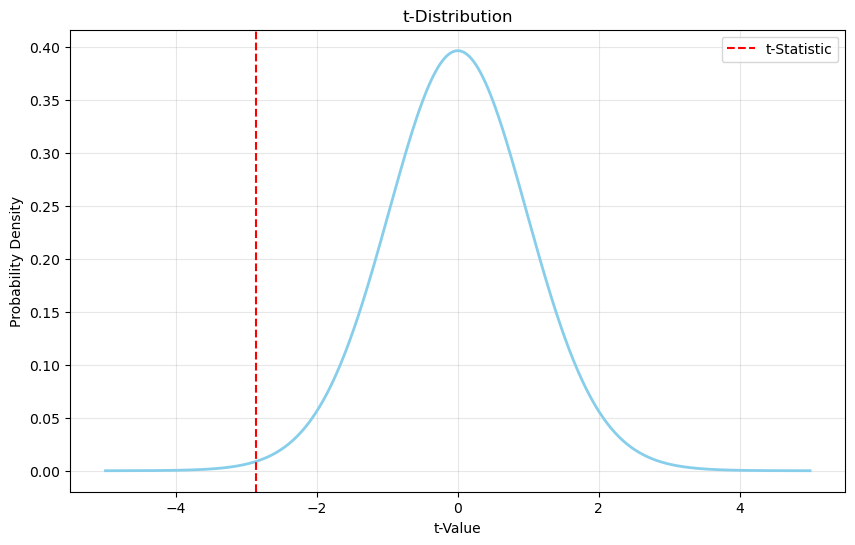

In [5]:
# Calculate the probability density function (PDF)
pdf = t.pdf(x, df)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("t-Distribution")
plt.xlabel('t-Value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.axvline(x=t_statistic, color='red', linestyle='--', label='t-Statistic')
plt.legend()
plt.show()

### Z-Score

* Parametric
* Univariate
* Continuous
* Directional
* Used for standardizing and comparing data points in a normal distribution

$$
Z = \frac{{x - \mu}}{{\sigma}}
$$

Z = Z-score<br>
x = data point<br>
μ = population mean<br>
σ = population standard deviation

**When to use:** Use when standardizing a variable to a standard normal distribution for comparison purposes.<br>
**Strengths:** Allows comparison across different scales, useful for identifying outliers.<br>
**Weaknesses:** Limited to normally distributed data.<br>
**Limitations:** Assumes normality.

In [6]:
from scipy.stats import norm

A retail manager wants to analyze the performance of two different stores in terms of their daily sales. The manager collects data on the daily sales for Store A and Store B over the past month. The average **daily sales for Store A is \\$500 with a standard deviation of \\$50**, while for **Store B, it is \\$600 with a standard deviation of \\$70**.

**Calculate the z-score** for the **average daily sales of Store A and Store B**. <br>
Based on the z-scores, **determine which store performed better relative to the average daily sales**.

In [7]:
# Store A statistics
mean_a = 500  # Average daily sales for Store A ($)
std_dev_a = 50  # Standard deviation of daily sales for Store A ($)

# Store B statistics
mean_b = 600  # Average daily sales for Store B ($)
std_dev_b = 70  # Standard deviation of daily sales for Store B ($)

# Daily sales for a particular day
daily_sales_a = 550  # Daily sales for Store A on a particular day ($)
daily_sales_b = 620  # Daily sales for Store B on a particular day ($)

# Generate x values (daily sales)
x = np.linspace(200, 800, 1000)  # Considering a range of daily sales from 200 to 800 dollars

In [8]:
# Calculate z-scores
z_score_a = (daily_sales_a - mean_a) / std_dev_a
z_score_b = (daily_sales_b - mean_b) / std_dev_b

print("Z-score for Store A:", z_score_a)
print("Z-score for Store B:", z_score_b)

# Determine which store performed better
better_store = "Store A" if z_score_a > z_score_b else "Store B"

print("Based on the z-scores, {} performed better relative to the average daily sales.".format(better_store))

Z-score for Store A: 1.0
Z-score for Store B: 0.2857142857142857
Based on the z-scores, Store A performed better relative to the average daily sales.


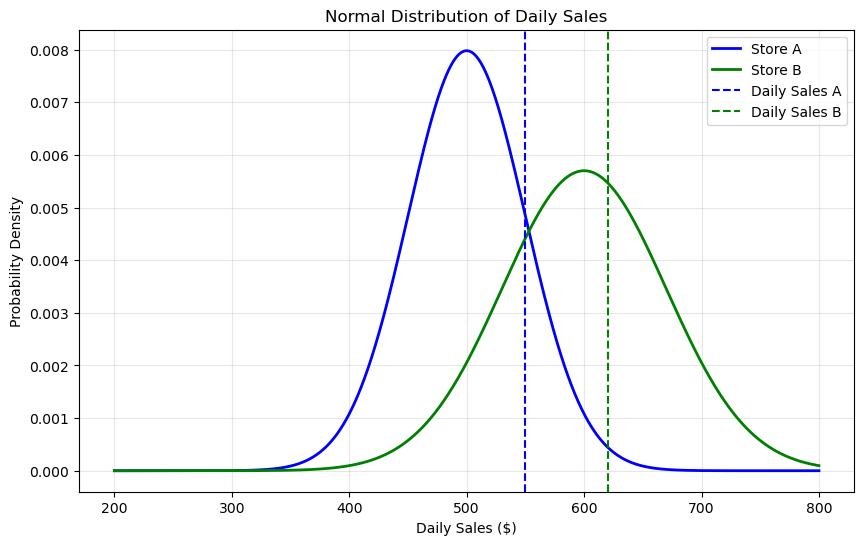

In [9]:
# Calculate the probability density function (PDF) for Store A
pdf_a = norm.pdf(x, mean_a, std_dev_a)

# Calculate the probability density function (PDF) for Store B
pdf_b = norm.pdf(x, mean_b, std_dev_b)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_a, color='blue', label='Store A', linewidth=2)
plt.plot(x, pdf_b, color='green', label='Store B', linewidth=2)
plt.title("Normal Distribution of Daily Sales")
plt.xlabel('Daily Sales ($)')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.axvline(x=daily_sales_a, color='blue', linestyle='--', label='Daily Sales A')
plt.axvline(x=daily_sales_b, color='green', linestyle='--', label='Daily Sales B')
plt.legend()
plt.show()

### F-Statistic

* Parametric
* Multivariate
* Continuous
* Non-directional
* Associated with analysis of variance (ANOVA) and comparing variances* 

$$
F = \frac{{\text{Between-group variance}}}{{\text{Within-group variance}}}
$$
"Between-group variance" refers to the variance between group means.<br>
"Within-group variance" refers to the variance within groups.

$$
F = \frac{{\text{MSB}}}{{\text{MSW}}}
$$
MSB is the mean square between groups (variance between group means)<br>
MSW is the mean square within groups (variance within groups)

**When to use:** Use in analysis of variance (ANOVA) and regression analysis to compare variances or test for differences in means among multiple groups.<br>
**Strengths:** Useful for comparing variances, applicable in regression and ANOVA.<br>
**Weaknesses:** Sensitive to departures from normality and unequal variances.<br>
**Limitations:** Assumes normality, equal variances, and independent samples.<br>

In [10]:
from scipy.stats import f_oneway
from scipy.stats import f

An analyst is comparing the performance of two different investment portfolios over the past year. The analyst wants to determine if there is a **significant difference** in the **annual returns between the two portfolios**. The 
annual returns for Portfolio A and Portfolio B are provided below:

| Portfolio | Returns                      |
|:-----------|:------------------------------|
| A         | 10%, 8%, 12%, 9%, 11%        |
| B         | 9%, 11%, 10%, 9%, 12%, 10%   |

Calculate the **F-statistic** to test if there is a significant difference in the annual returns between Portfolio A and Portfolio B.

Determine if there is a significant difference based on the **F-statistic and a significance level of 0.05**.

In [11]:
# Annual returns for Portfolio A and Portfolio B
returns_a = [10, 8, 12, 9, 11]
returns_b = [9, 11, 10, 9, 12, 10]

# Generate x values (F-values)
x = np.linspace(0.01, 10, 1000)  # Considering a range of F-values

# Degrees of freedom
dfn = len(returns_a) - 1
dfd = len(returns_b) - 1

In [12]:
# Calculate the F-statistic and p-value
f_statistic, p_value = f_oneway(returns_a, returns_b)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Determine if there is a significant difference
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the annual returns between Portfolio A and Portfolio B.")
else:
    print("There is no significant difference in the annual returns between Portfolio A and Portfolio B.")

F-statistic: 0.0405040504050405
p-value: 0.8449732660946977
There is no significant difference in the annual returns between Portfolio A and Portfolio B.


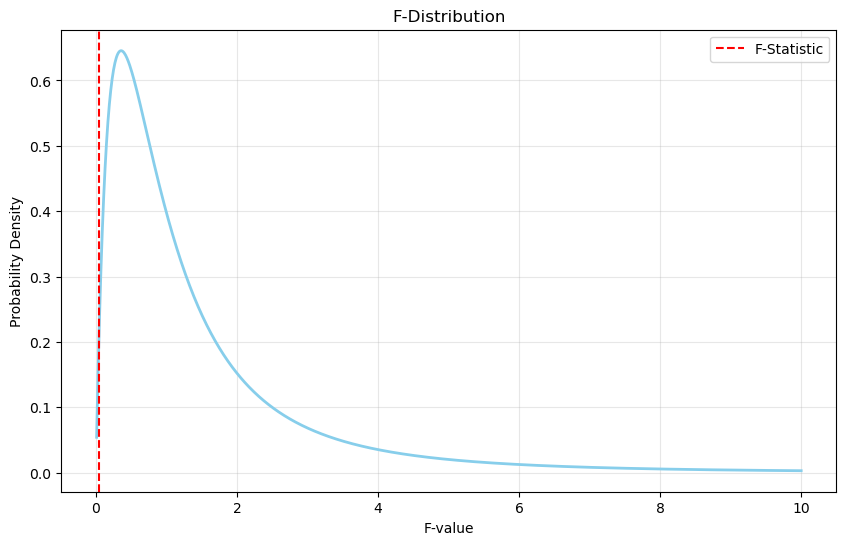

In [13]:
# Calculate the probability density function (PDF)
pdf = f.pdf(x, dfn, dfd)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("F-Distribution")
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.axvline(x=f_statistic, color='red', linestyle='--', label='F-Statistic')
plt.legend()
plt.show()

### Chi-Square Statistic

* Non-parametric
* Univariate
* Categorical
* Non-directional
* Associated with tests of independence and goodness-of-fit tests

$$
\chi^2 = \sum \frac{{(O - E)^2}}{{E}}
$$

$ X^2 $  is the chi-square statistic<br>
O is the observed frequency<br>
E is the expected frequency

**When to use:** Use in hypothesis testing, goodness-of-fit tests, and tests of independence in categorical data analysis.<br>
**Strengths:** Useful for categorical data analysis, widely applicable.<br>
**Weaknesses:** Sensitive to sample size, assumptions may not always hold.<br>
**Limitations:** Assumes categorical data or specific distributions, sensitive to small expected cell frequencies.

In [14]:
from scipy.stats import chi2_contingency

A market researcher wants to determine if there is a **significant relationship between** the **age group** of customers and their preferred **mode of shopping** (online or in-store). The researcher collects data from a **sample of 200 customers** and tabulates the results in a contingency table, as shown below:

|  | Online Shopping | In-Store Shopping |
| :------------|:--------------:| :-------------:|
| Under 30 years old | 50 | 30 |
| 30-50 years old | 40 | 45 |
| Over 50 years old | 20 | 15 |

**Calculate the Chi-Square statistic** to test if there is a significant relationship between the **age group** of customers and their **preferred mode of shopping**. <br>
Determine if there is a significant relationship based on the **Chi-Square statistic and a significance level of 0.05**.

In [15]:
# Contingency table
observed = [[50, 30],
            [40, 45],
            [20, 15]]

In [16]:
# Calculate the Chi-Square statistic, p-value, degrees of freedom, and expected frequencies
chi_square_statistic, p_value, dof, expected = chi2_contingency(observed)

print("Chi-Square Statistic:", chi_square_statistic)
print("p-value:", p_value)

# Determine if there is a significant relationship
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between the age group of customers and their preferred mode of shopping.")
else:
    print("There is no significant relationship between the age group of customers and their preferred mode of shopping.")

Chi-Square Statistic: 4.048892284186402
p-value: 0.13206696927038877
There is no significant relationship between the age group of customers and their preferred mode of shopping.


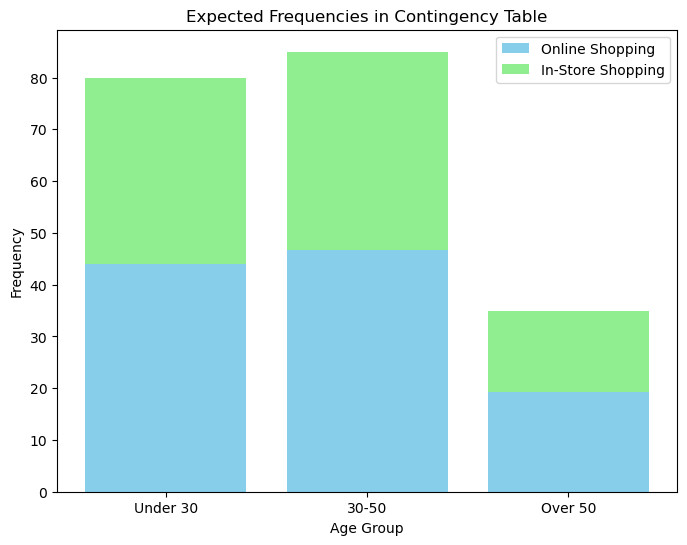

In [17]:
# Expected frequencies
expected_freq = np.array(expected)

# Plot the expected frequencies
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(expected_freq)), expected_freq[:, 0], color='skyblue', label='Online Shopping')
plt.bar(np.arange(len(expected_freq)), expected_freq[:, 1], color='lightgreen', bottom=expected_freq[:, 0], label='In-Store Shopping')
plt.title('Expected Frequencies in Contingency Table')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(len(expected_freq)), ['Under 30', '30-50', 'Over 50'])
plt.legend()
plt.show()

### Pearson’s Correlation Coefficient 

* Parametric
* Bivariate
* Continuous
* Directional
* Measures linear association between two continuous variables

$$
r = \frac{{\sum (x_i - \bar{x})(y_i - \bar{y})}}{{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}}
$$

r = Pearson's correlation coefficient<br>
$ x_i y_i $ = individual data points<br>
$ \bar{x} \bar{y} $ = means of x and y respectively

**When to use:** Use to measure the strength and direction of the linear relationship between two continuous variables.<br>
**Strengths:** Simple to interpret, widely used.<br>
**Weaknesses:** Limited to detecting linear relationships, sensitive to outliers.<br>
**Limitations:** Assumes linearity and normality.

A marketing analyst wants to **analyze the relationship between advertising expenditure and sales revenue** for a product. The analyst collects data on monthly advertising expenditure (in thousands of dollars) and corresponding monthly sales revenue (in thousands of dollars) for the past year. The data is as follows:

| Month | Advertising Expenditure (x) | Sales Revenue (y) |
|:-------:|:-----------------------------:|:-------------------:|
|   1   |             20              |        100        |
|   2   |             25              |        110        |
|   3   |             30              |        120        |
|   4   |             35              |        130        |
|   5   |             40              |        140        |
|   6   |             45              |        150        |
|   7   |             50              |        160        |
|   8   |             55              |        170        |
|   9   |             60              |        180        |
|  10   |             65              |        190        |
|  11   |             70              |        200        |
|  12   |             75              |        210        |

Calculate the **Pearson’s correlation coefficient** to determine the **strength and direction of the linear relationship** between advertising expenditure and sales revenue. <br>
Determine if there is a **significant correlation** between advertising expenditure and sales revenue based on the **Pearson’s correlation coefficient and a significance level of 0.05**.

In [18]:
# Monthly advertising expenditure (in thousands of dollars)
x = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

# Monthly sales revenue (in thousands of dollars)
y = np.array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210])


In [19]:
# Calculate Pearson's correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

print("Pearson's Correlation Coefficient:", correlation_coefficient)

# Determine if there is a significant correlation
alpha = 0.05
if abs(correlation_coefficient) >= 0.5:
    print("There is a strong correlation between advertising expenditure and sales revenue.")
elif 0.3 <= abs(correlation_coefficient) < 0.5:
    print("There is a moderate correlation between advertising expenditure and sales revenue.")
elif 0.1 <= abs(correlation_coefficient) < 0.3:
    print("There is a weak correlation between advertising expenditure and sales revenue.")
else:
    print("There is no significant correlation between advertising expenditure and sales revenue.")

Pearson's Correlation Coefficient: 1.0
There is a strong correlation between advertising expenditure and sales revenue.


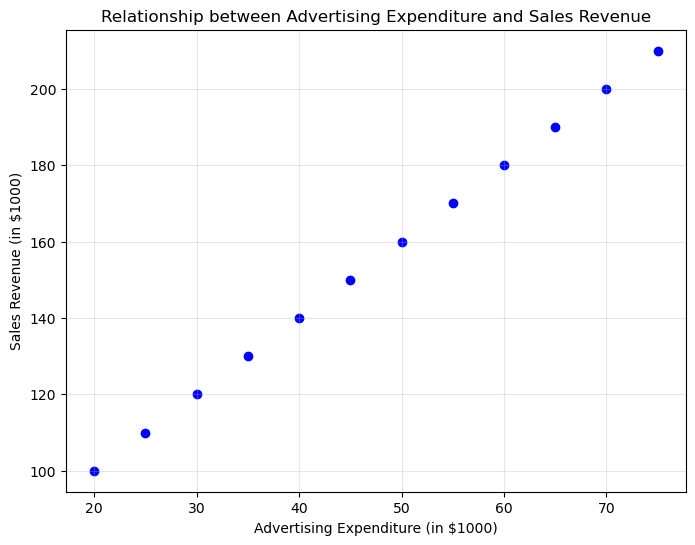

In [20]:
# Plot the relationship between advertising expenditure and sales revenue
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.title('Relationship between Advertising Expenditure and Sales Revenue')
plt.xlabel('Advertising Expenditure (in $1000)')
plt.ylabel('Sales Revenue (in $1000)')
plt.grid(True, alpha=0.3)
plt.show()

### Spearman’s Rank Correlation Coefficient

* Non-parametric
* Bivariate
* Continuous
* Directional
* Measures monotonic association between two continuous variables

$$
\rho = 1 - \frac{{6 \sum d_i^2}}{{n(n^2 - 1)}}
$$

ρ = Spearman's rank correlation coefficient<br>
$ d_i $  = difference in ranks between corresponding pairs of observations<br>
n = number of paired observations

**When to use:** Use to measure the strength and direction of the monotonic relationship between two variables, regardless of linearity.<br>
**Strengths:** Robust to outliers, does not assume linearity.<br>
**Weaknesses:** Less efficient than Pearson's correlation for linear relationships.<br>
**Limitations:** Assumes monotonicity.

In [21]:
from scipy.stats import spearmanr

A human resources manager wants to **analyze the relationship between the years of experience** and the **performance ratings** of employees in a company. The manager collects data on the **years of experience** and corresponding **performance ratings (on a scale of 1 to 10)** for a sample of employees. The data is as follows:

| Employee | Years of Experience (x) | Performance Rating (y) |
|:----------:|:--------------------------:|:------------------------:|
|    1     |             5            |            7           |
|    2     |             3            |            6           |
|    3     |             8            |            8           |
|    4     |             4            |            5           |
|    5     |             6            |            9           |
|    6     |             7            |            8           |
|    7     |             2            |            4           |
|    8     |             9            |            9           |
|    9     |             1            |            3           |
|    10    |             10           |           10           |

Calculate the **Spearman’s rank correlation coefficient** to determine the **strength and direction of the monotonic relationship** between years of experience and performance ratings. <br>
Determine if there is a significant correlation between years of experience and performance ratings based on the **Spearman’s rank correlation coefficient and a significance level of 0.05**.

In [22]:
# Years of experience
years_of_experience = [5, 3, 8, 4, 6, 7, 2, 9, 1, 10]

# Performance ratings
performance_ratings = [7, 6, 8, 5, 9, 8, 4, 9, 3, 10]

In [23]:
# Calculate Spearman's rank correlation coefficient
correlation_coefficient, p_value = spearmanr(years_of_experience, performance_ratings)

print("Spearman's Rank Correlation Coefficient:", correlation_coefficient)

# Determine if there is a significant correlation
alpha = 0.05
if abs(correlation_coefficient) >= 0.5:
    print("There is a strong monotonic relationship between years of experience and performance ratings.")
elif 0.3 <= abs(correlation_coefficient) < 0.5:
    print("There is a moderate monotonic relationship between years of experience and performance ratings.")
elif 0.1 <= abs(correlation_coefficient) < 0.3:
    print("There is a weak monotonic relationship between years of experience and performance ratings.")
else:
    print("There is no significant monotonic relationship between years of experience and performance ratings.")

Spearman's Rank Correlation Coefficient: 0.9329441729782294
There is a strong monotonic relationship between years of experience and performance ratings.


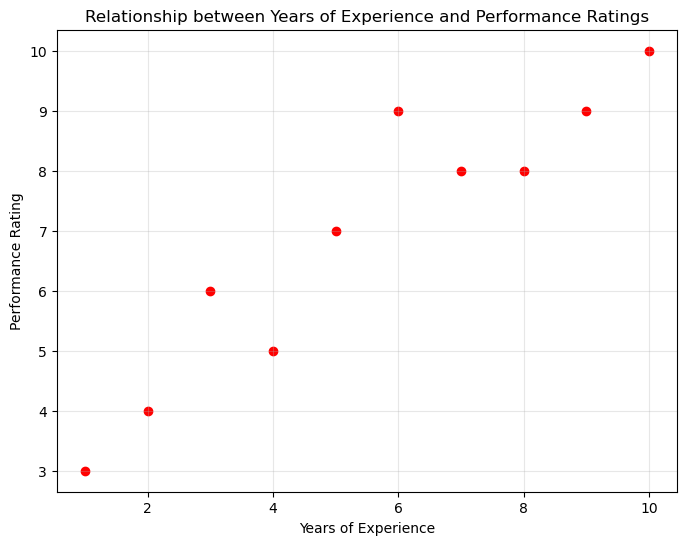

In [24]:
# Plot the relationship between years of experience and performance ratings
plt.figure(figsize=(8, 6))
plt.scatter(years_of_experience, performance_ratings, color='red')
plt.title('Relationship between Years of Experience and Performance Ratings')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Rating')
plt.grid(True, alpha=0.3)
plt.show()

### Wilcoxon Rank-Sum Statistic

* Non-parametric
* Univariate
* Continuous
* Non-directional
* Associated with testing for differences between two independent groups

$$
U = R_1 - \frac{{n_1(n_1 + 1)}}{2}
$$

U = Wilcoxon Rank-Sum Statistic<br>
$ R_1 $  = sum of ranks of the observations from sample 1<br>
$ n_1 $  = sample size of sample 1

**When to use:** Use to compare the distributions of two independent samples when assumptions of normality are violated.<br>
**Strengths:** Robust to non-normality, suitable for small sample sizes.<br>
**Weaknesses:** Less efficient than parametric tests for normally distributed data.<br>
**Limitations:** Requires independent samples and ordinal or continuous data.

In [25]:
from scipy.stats import ranksums

A manufacturing company is **evaluating the performance** of two different production lines in terms of the number of **defective products produced**. The company collects data on the number of defective products produced by each production line over a **week**. The data is as follows:

| Production Line | Data                 |
|:-----------------|:----------------------|
| A               | 10, 8, 12, 9, 11, 7, 10 |
| B               | 6, 9, 7, 11, 8, 10, 12 |

Use the **Wilcoxon Rank-Sum Test** to determine if there is a **significant difference** in the number of defective products produced by the two production lines. <br>
Interpret the results of the test.

In [26]:
# Number of defective products produced by Production Line A
line_a = [10, 8, 12, 9, 11, 7, 10]

# Number of defective products produced by Production Line B
line_b = [6, 9, 7, 11, 8, 10, 12]

In [27]:
# Perform the Wilcoxon Rank-Sum Test
statistic, p_value = ranksums(line_a, line_b)

print("Wilcoxon Rank-Sum Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the number of defective products produced by the two production lines.")
else:
    print("There is no significant difference in the number of defective products produced by the two production lines.")

Wilcoxon Rank-Sum Statistic: 0.5111012519999519
p-value: 0.6092801593041028
There is no significant difference in the number of defective products produced by the two production lines.


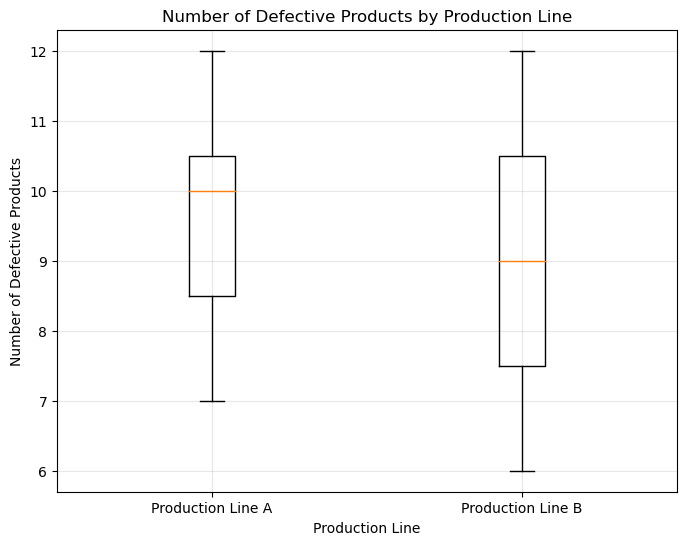

In [28]:
# Combine the data for plotting
data = [line_a, line_b]
labels = ['Production Line A', 'Production Line B']

# Plot boxplots for each production line
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.title('Number of Defective Products by Production Line')
plt.xlabel('Production Line')
plt.ylabel('Number of Defective Products')
plt.grid(True, alpha=0.3)
plt.show()

### Kruskal-Wallis H Statistic

* Non-parametric
* Multivariate
* Continuous
* Non-directional
* Associated with testing for differences among three or more independent groups* 

$$
H = \frac{{12}}{{N(N + 1)}} \left( \sum \frac{{R_i^2}}{{n_i}} - 3(N + 1) \right)
$$

H = Kruskal-Wallis H Statistic<br>
N = total number of observations across all groups<br>
$ R_i $  = sum of ranks for the<br>
$ n_i $  = number of observations in the ith group<br>

**When to use:** Use to compare the distributions of three or more independent samples when assumptions of normality are violated.<br>
**Strengths:** Robust to non-normality, suitable for small sample sizes.<br>
**Weaknesses:** Less efficient than parametric tests for normally distributed data.

In [29]:
from scipy.stats import kruskal

A restaurant owner is comparing the satisfaction ratings of three different **dishes (A, B, and C)** on the menu. The owner collects feedback from customers who ordered each dish and assigns a **satisfaction rating on a scale of 1 to 10**. The data is as follows:

| Dish   | Ratings             |
|:--------|:---------------------|
| A      | 7, 8, 6, 9, 7, 8, 5 |
| B      | 6, 7, 8, 7, 9, 6, 8 |
| C      | 8, 9, 7, 6, 8, 7, 9 |

Use the **Kruskal-Wallis H Test** to determine if there is a **significant difference in satisfaction ratings among the three dishes**. <br>
Interpret the results of the test.

In [30]:
# Satisfaction ratings for each dish
dish_a = [7, 8, 6, 9, 7, 8, 5]
dish_b = [6, 7, 8, 7, 9, 6, 8]
dish_c = [8, 9, 7, 6, 8, 7, 9]

In [31]:
# Perform the Kruskal-Wallis H Test
statistic, p_value = kruskal(dish_a, dish_b, dish_c)

print("Kruskal-Wallis H Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in satisfaction ratings among the three dishes.")
else:
    print("There is no significant difference in satisfaction ratings among the three dishes.")

Kruskal-Wallis H Statistic: 0.7940886699507408
p-value: 0.672304218380947
There is no significant difference in satisfaction ratings among the three dishes.


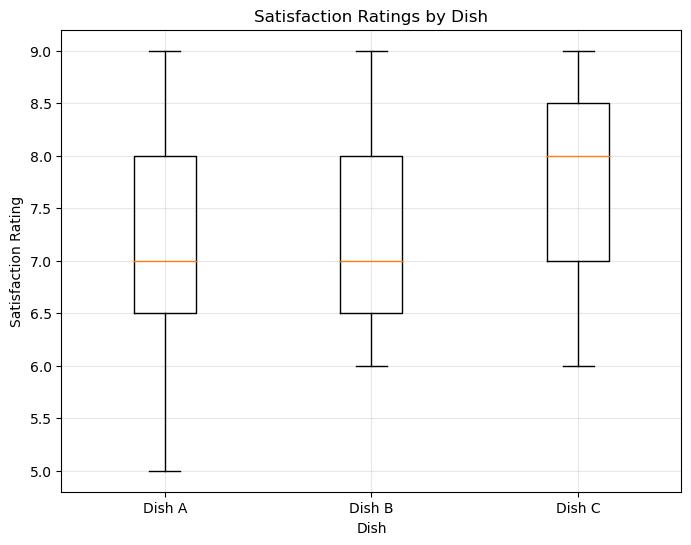

In [32]:
# Combine the data for plotting
data = [dish_a, dish_b, dish_c]
labels = ['Dish A', 'Dish B', 'Dish C']

# Plot boxplots for each dish
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.title('Satisfaction Ratings by Dish')
plt.xlabel('Dish')
plt.ylabel('Satisfaction Rating')
plt.grid(True, alpha=0.3)
plt.show()

### Kolmogorov-Smirnov Statistic

* Non-parametric
* Univariate
* Continuous
* Non-directional
* Associated with testing for differences between two empirical cumulative distribution functions

$$
D = \max_{x} \left| F_1(x) - F_2(x) \right|
$$

D = Kolmogorov-Smirnov statistic<br>
$ F_1(x) F_2(x) $ = empirical cumulative distribution functions (ECDFs) of the two samples being compared

**When to use:** Use to compare the distributions of two samples or to test goodness-of-fit.<br>
**Strengths:** Non-parametric, suitable for continuous or ordinal data.<br>
**Weaknesses:** Less powerful than other tests for specific distributions.<br>
**Limitations:** Assumes continuous data and independent samples.

In [33]:
from scipy.stats import ks_2samp

Suppose you are a data analyst working for an e-commerce company. Your company is interested in comparing the **distribution of purchase amounts between two different marketing campaigns** to determine if there is a significant difference in their effectiveness. You have collected data on the purchase amounts from both campaigns, and you want to use the Kolmogorov-Smirnov (KS) statistic to assess the difference between the distributions.

Here are the purchase amounts (in dollars) for each campaign:

| Campaign   | Data                         |
|:------------:|:------------------------------|
| A          | 35, 42, 48, 50, 52, 55, 60, 65, 70, 75 |
| B          | 30, 38, 40, 45, 55, 58, 62, 67, 72, 80 |

Perform a **Kolmogorov-Smirnov test** to determine if there is a **significant difference** between the distribution of purchase amounts for Campaign A and Campaign B. Then, visualize the cumulative distribution functions (CDFs) for both campaigns on the same graph.

In [34]:
# Purchase amounts for Campaign A and Campaign B
campaign_a = np.array([35, 42, 48, 50, 52, 55, 60, 65, 70, 75])
campaign_b = np.array([30, 38, 40, 45, 55, 58, 62, 67, 72, 80])

In [35]:
# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(campaign_a, campaign_b)

# Print KS statistic and p-value
print("Kolmogorov-Smirnov Statistic:", ks_statistic)
print("P-value:", p_value)

Kolmogorov-Smirnov Statistic: 0.2
P-value: 0.9944575548290717


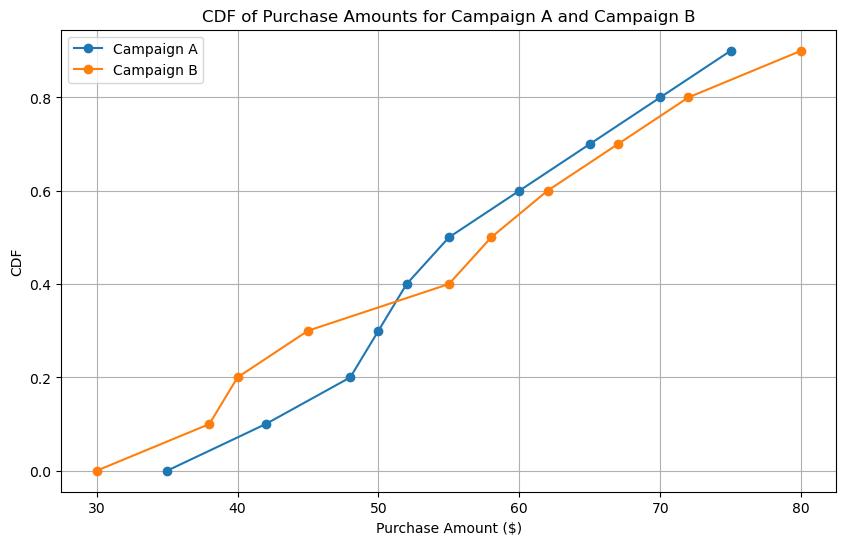

In [36]:
# Plot the cumulative distribution functions (CDFs)
plt.figure(figsize=(10, 6))
plt.plot(np.sort(campaign_a), np.linspace(0, 1, len(campaign_a), endpoint=False), label='Campaign A', marker='o')
plt.plot(np.sort(campaign_b), np.linspace(0, 1, len(campaign_b), endpoint=False), label='Campaign B', marker='o')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('CDF')
plt.title('CDF of Purchase Amounts for Campaign A and Campaign B')
plt.legend()
plt.grid(True)
plt.show()

### Mann-Whitney Staistic

* Non-parametric
* Univariate
* Continuous
* Non-directional
* Associated with testing for differences between two independent samples

$$
U = R_1 - \frac{{n_1(n_1 + 1)}}{2}
$$

U = Mann-Whitney U statistic<br>
$ R_1 $ = sum of ranks of the observations from sample 1<br>
$ n_1 $ = sample size of sample 1

In [37]:
from scipy.stats import mannwhitneyu

As a market analyst for a retail company, you're evaluating the effectiveness of two different pricing strategies (Strategy A and Strategy B) on sales revenue. You've collected **data on the daily sales revenue** (in dollars) generated by each strategy over a **period of 10 days**.


Here are the daily sales revenue data for each strategy:

| Strategy   | Data                                               |
|:------------|:----------------------------------------------------|
| A          | 1200, 1300, 1250, 1400, 1350, 1450, 1300, 1250, 1400, 1350 |
| B          | 1150, 1280, 1230, 1380, 1320, 1420, 1270, 1220, 1370, 1330 |

You want to determine if there is a **significant difference** in the **median sales revenue between Strategy A and Strategy B** using the Mann-Whitney U test. Additionally, visualize the data distribution for both strategies using boxplots.

In [38]:
# Daily sales revenue data for Strategy A and Strategy B
strategy_a = np.array([1200, 1300, 1250, 1400, 1350, 1450, 1300, 1250, 1400, 1350])
strategy_b = np.array([1150, 1280, 1230, 1380, 1320, 1420, 1270, 1220, 1370, 1330])

In [39]:
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(strategy_a, strategy_b, alternative='two-sided')

# Print Mann-Whitney U statistic and p-value
print("Mann-Whitney U Statistic:", u_statistic)
print("P-value:", p_value)

Mann-Whitney U Statistic: 59.0
P-value: 0.5198945163559368


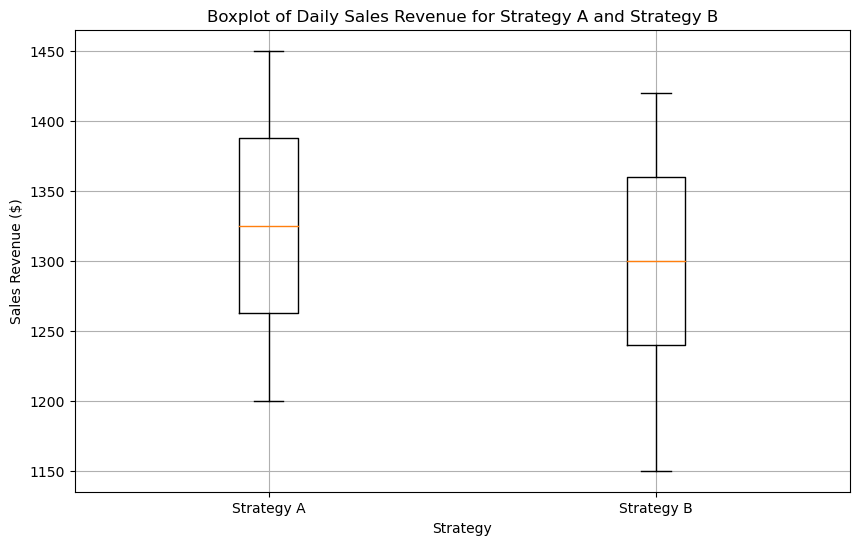

In [40]:
# Visualize the data distribution using boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([strategy_a, strategy_b], labels=['Strategy A', 'Strategy B'])
plt.title('Boxplot of Daily Sales Revenue for Strategy A and Strategy B')
plt.xlabel('Strategy')
plt.ylabel('Sales Revenue ($)')
plt.grid(True)
plt.show()